# E-Commerce Data Analysis

## 1) Context

This work is based on a data set of transnational sales from an UK-based non-store online retail.

Relevant notes:

- All transactions occurred between 01/12/2010 and 09/12/2011;
- The company mainly sells unique all-occasion gifts;
- Many customers of the company are wholesalers.

This data set is available on Kaggle by the tittle ["E-Commerce Data"](https://www.kaggle.com/carrie1/ecommerce-data)

## 2) Insights

## 3) Data Preparation

Loading all the modules that will be used:

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

from pandas_profiling import ProfileReport
import missingno as msno
from datetime import datetime

<br/>
Then reading the data set and taking the first look:

In [2]:
df = pd.read_csv('../1985_3404_bundle_archive/data.csv', encoding = 'ISO-8859-1')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


<br/>
Creating a report to get an overview of the data:

In [4]:
# This doesn't appear on github, but the design is great
# It is used only as an overview
# Everything we need from this will be explored later
profile = ProfileReport(df, title='Profiling Diabets',html={'style':{'full_width':True}})
profile.to_notebook_iframe()

Render HTML: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.78it/s]


<br/>
Let's focus on data types.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


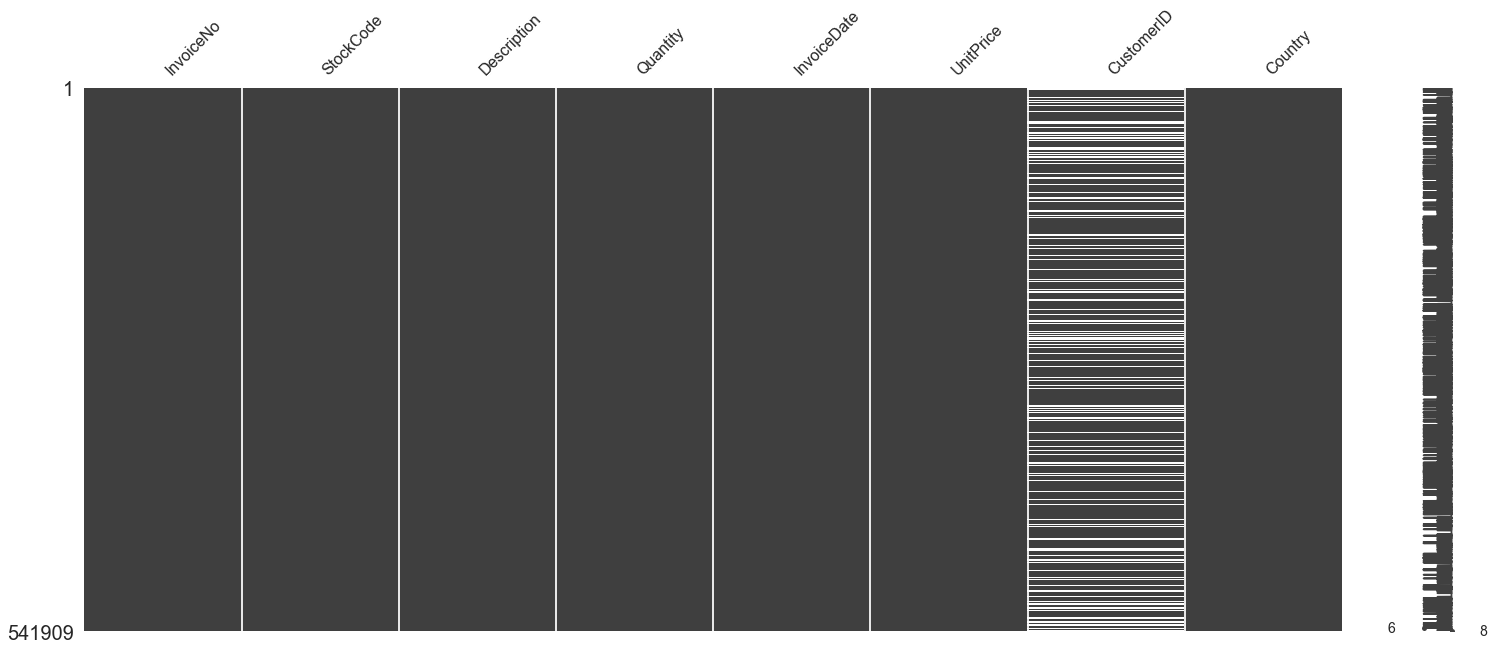

In [6]:
# Distribuition of missing values
msno.matrix(df)

There is no problem in keeping fields that we won't do calculations as "object", such as: InvoiceNo and StockCode. There are missing values in CustomerID, but I will keep it this way for now.


The next step is to transform InvoiceDate to "datetime".

In [7]:
df['InvoiceDate'] = df['InvoiceDate'].apply(lambda date: datetime.strptime(date, '%m/%d/%Y %H:%M'))

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


<br/>
I will split the InvoiceDate column into: Year, Month, WeekDay, Hour and YearMonth. This way, we can group our data however we want based on any time analysis.

In [9]:
df['Year'] = df['InvoiceDate'].apply(lambda time: time.year)

df['Month'] = df['InvoiceDate'].apply(lambda time: time.month)

df['WeekDay'] = df['InvoiceDate'].apply(lambda time: time.weekday())

df['Hour'] = df['InvoiceDate'].apply(lambda date: date.hour)

# zfill(2) is used to fill the string with zeros until it is 2 characters long.
df['YearMonth'] = df['InvoiceDate'].apply(lambda time: str(time.year) + str(time.month).zfill(2))

In [10]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,WeekDay,Hour,YearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,2,8,201012
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,2,8,201012
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,2,8,201012
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,2,8,201012
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,2,8,201012


<br/>
We have Quantity and UnitPrice, but we don't have the amount spent on each line.

In [11]:
df['AmountSpent'] = df['Quantity'] * df['UnitPrice']

<br/>
Taking a look if there are missing values...

In [12]:
df.isna().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
AmountSpent         0
YearMonth           0
Hour                0
WeekDay             0
Month               0
Year                0
Country             0
UnitPrice           0
InvoiceDate         0
Quantity            0
StockCode           0
InvoiceNo           0
dtype: int64

We could erase the NaN values, but it will damage the sum of the revenue.

There is nothing we can do about the CustomerID's missing values. I will analyse Description column in the Exploratory Data Analysis section.

## 4) Exploratory Data Analysis (EDA)

In Data Preparation section it was possible to observe missing values in Description column. Let's take an overview of the products.

In [13]:
products = df[['StockCode', 'Description']].drop_duplicates()
products.head()

,StockCode,Description
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER
1,71053,WHITE METAL LANTERN
2,84406B,CREAM CUPID HEARTS COAT HANGER
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE
4,84029E,RED WOOLLY HOTTIE WHITE HEART.


In [14]:
products['StockCode'].value_counts()

20713     9
23084     8
21830     7
85175     7
23131     6
         ..
23337     1
22702     1
22500     1
23442     1
84673A    1
Name: StockCode, Length: 4070, dtype: int64

<br/>
There is more than one description for the same product. Looking at the product with the stock code equal to 20713...

In [15]:
products[products['StockCode'] == '20713']

,StockCode,Description
522,20713,JUMBO BAG OWLS
136272,20713,NaN
263884,20713,wrongly marked. 23343 in box
380688,20713,wrongly coded-23343
403534,20713,found
414145,20713,Found
415582,20713,wrongly marked 23343
420390,20713,Marked as 23343
422750,20713,wrongly coded 23343


<br/>
The product with StockCode equal to 20713 actually is JUMBO BAG OWLS. There are missing values, product incorrectly marked as 23343 and found(?).
Regardless, we can assume the revenue amount is correct, so we will not change any value.

In [16]:
products['StockCode'].map(len).value_counts()

5     4187
6     1519
8       17
12       9
1        5
7        4
4        4
9        3
3        2
2        2
Name: StockCode, dtype: int64

<br/>
There are StockCode with different lengths.

In [17]:
# StockCode with 6 characters
products[products['StockCode'].map(len) == 6].head()

,StockCode,Description
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER
2,84406B,CREAM CUPID HEARTS COAT HANGER
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE
4,84029E,RED WOOLLY HOTTIE WHITE HEART.
60,82494L,WOODEN FRAME ANTIQUE WHITE


In [18]:
# StockCode with 5 characters
products[products['StockCode'].map(len) == 5].head()

,StockCode,Description
1,71053,WHITE METAL LANTERN
5,22752,SET 7 BABUSHKA NESTING BOXES
6,21730,GLASS STAR FROSTED T-LIGHT HOLDER
7,22633,HAND WARMER UNION JACK
8,22632,HAND WARMER RED POLKA DOT


<br/>
It seems that StockCode values represented with 6 or 5 characters are standard sales.

In [19]:
products['StockCode'].map(len).value_counts().index

Int64Index([5, 6, 8, 12, 1, 7, 4, 9, 3, 2], dtype='int64')

In [20]:
# Create a dataframe with StockCode descriptions
def desc_stockcode():
    
    # StockCode lengths different from 5 and 6
    stockcode_len = [8, 12, 1, 7, 4, 9, 3, 2]
    
    stockcode_len = sorted(stockcode_len)
    
    df_stockcode = (products[products['StockCode'].map(len) == stockcode_len[0]])
    
    for length in stockcode_len[1:]:
        df_stockcode = pd.concat([df_stockcode, products[products['StockCode'].map(len) == length]],
                                 ignore_index=True)
    
    return df_stockcode
                             
desc_stockcode()

,StockCode,Description
0,D,Discount
1,M,Manual
2,S,SAMPLES
3,m,Manual
4,B,Adjust bad debt
5,C2,CARRIAGE
6,C2,NaN
7,DOT,DOTCOM POSTAGE
8,DOT,NaN
9,POST,POSTAGE


<br/>
Analysing the previous dataframe, StockCode can represent special events as discounts, bad debt and gift vouchers.

In [21]:
df.describe()

,Quantity,UnitPrice,CustomerID,Year,Month,WeekDay,Hour,AmountSpent
count,541909.000000,541909.000000,406829.000000,541909.000000,541909.000000,541909.000000,541909.000000,541909.000000
mean,9.552250,4.611114,15287.690570,2010.921609,7.553128,2.431277,13.078729,17.987795
std,218.081158,96.759853,1713.600303,0.268787,3.509055,1.844709,2.443270,378.810824
min,-80995.000000,-11062.060000,12346.000000,2010.000000,1.000000,0.000000,6.000000,-168469.600000
25%,1.000000,1.250000,13953.000000,2011.000000,5.000000,1.000000,11.000000,3.400000
50%,3.000000,2.080000,15152.000000,2011.000000,8.000000,2.000000,13.000000,9.750000
75%,10.000000,4.130000,16791.000000,2011.000000,11.000000,4.000000,15.000000,17.400000
max,80995.000000,38970.000000,18287.000000,2011.000000,12.000000,6.000000,20.000000,168469.600000


<br/>
There are negative values in Quantity and UnitPrice.

In [22]:
len(df[(df['Quantity'] < 0)])

10624

In [23]:
len(df[(df['UnitPrice'] < 0)])

2

<br/>
There are 10624 negative values in Quantity and only 2 in UnitPrice. I will explore and find the meaning of these values.

In [24]:
# Starting with UnitPrice, because there are only 2 negative values.
df[(df['UnitPrice'] < 0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,WeekDay,Hour,YearMonth,AmountSpent
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom,2011,8,4,14,201108,-11062.06
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom,2011,8,4,14,201108,-11062.06


<br/>
Negative UnitPrice values are bad debt.

In [25]:
# Checking negative Quantity
df[(df['Quantity'] < 0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,WeekDay,Hour,YearMonth,AmountSpent
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,2010,12,2,9,201012,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,2010,12,2,9,201012,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,2010,12,2,10,201012,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,2010,12,2,10,201012,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,2010,12,2,10,201012,-6.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,2011,12,4,9,201112,-9.13
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,2011,12,4,10,201112,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,2011,12,4,11,201112,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,2011,12,4,11,201112,-1.25


In [26]:
# Checking InvoiceNo starting character.
df[(df['Quantity'] < 0)]['InvoiceNo'].apply(lambda invoice: invoice[0]).value_counts()

C    9288
5    1336
Name: InvoiceNo, dtype: int64

In [27]:
df[(df['Quantity'] < 0)].sort_values('InvoiceNo')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,WeekDay,Hour,YearMonth,AmountSpent
2406,536589,21777,NaN,-10,2010-12-01 16:50:00,0.00,NaN,United Kingdom,2010,12,2,16,201012,-0.00
4347,536764,84952C,NaN,-38,2010-12-02 14:42:00,0.00,NaN,United Kingdom,2010,12,3,14,201012,-0.00
7188,536996,22712,NaN,-20,2010-12-03 15:30:00,0.00,NaN,United Kingdom,2010,12,4,15,201012,-0.00
7189,536997,22028,NaN,-20,2010-12-03 15:30:00,0.00,NaN,United Kingdom,2010,12,4,15,201012,-0.00
7190,536998,85067,NaN,-6,2010-12-03 15:30:00,0.00,NaN,United Kingdom,2010,12,4,15,201012,-0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,2011,12,4,9,201112,-9.13
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,2011,12,4,10,201112,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,2011,12,4,11,201112,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,2011,12,4,11,201112,-1.25


In [28]:
# How many sales had UnitPrice equal to 0?
sum(df['UnitPrice'] == 0)

2515

In [29]:
# How many InvoiceNo codes start with "5"?
sum(df[df['UnitPrice'] == 0]['InvoiceNo'].apply(lambda invoice: invoice[0] == '5'))

2515

<br/>
All InvoiceNo starting with "C" seems to be canceled sales or some kind of discount.

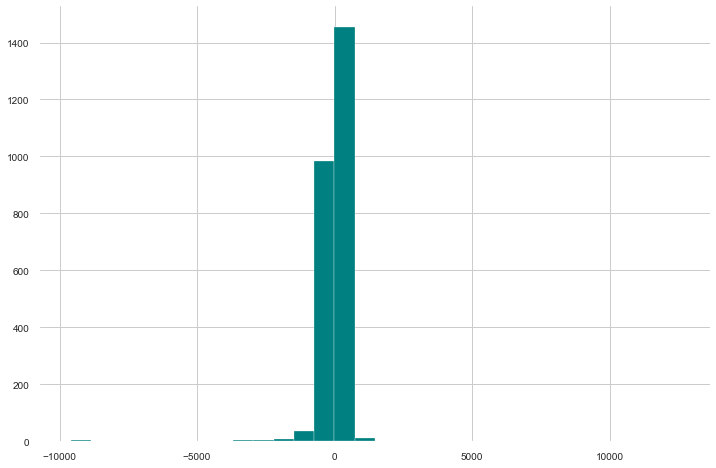

In [30]:
# Analysing UnitPrice equal 0
plt.figure(figsize=(12,8))
df[df['UnitPrice'] == 0]['Quantity'].hist(bins=30, color='teal')

<br/>
There are positive and negative Quantity values for invoices with UnitPrice equal to 0. Maybe it's free items from promotions or events.

<br/>
Now that we know our data set better, let's do some visualization and answer some questions.

### 4.1) How were sales over the months?

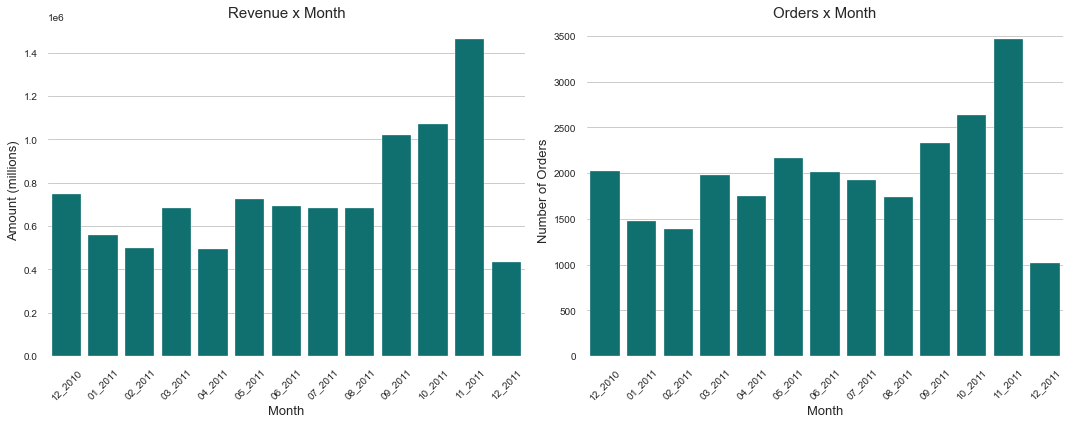

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Revenue x Month
ax = df.groupby('YearMonth').sum()['AmountSpent']

sns.barplot(x=ax.index, y=ax, color='teal', ax=axes[0])

axes[0].set_title('Revenue x Month', fontsize=15)
axes[0].set_xlabel('Month', fontsize=13)
axes[0].set_ylabel('Amount (millions)', fontsize=13)

label = df['YearMonth'].apply(lambda date: date[4:] + '_' + date[:4]).unique()

axes[0].set_xticklabels(label, rotation=45)

# Orders x Month
ax = df.groupby('InvoiceNo')['YearMonth'].unique().value_counts().sort_index()

# Removing the index brackets
ax.index = [index[0] for index in ax.index]

sns.barplot(x=ax.index, y=ax, color='teal', ax=axes[1])

axes[1].set_title('Orders x Month', fontsize=15)
axes[1].set_xlabel('Month', fontsize=13)
axes[1].set_ylabel('Number of Orders', fontsize=13)

axes[1].set_xticklabels(label, rotation=45)

plt.tight_layout()

<br/>
Remember that sales occurred between 01/12/2010 and 09/12/2011. December 2011 sales go through the 9th.

### 4.2) How many orders per day (of week)?

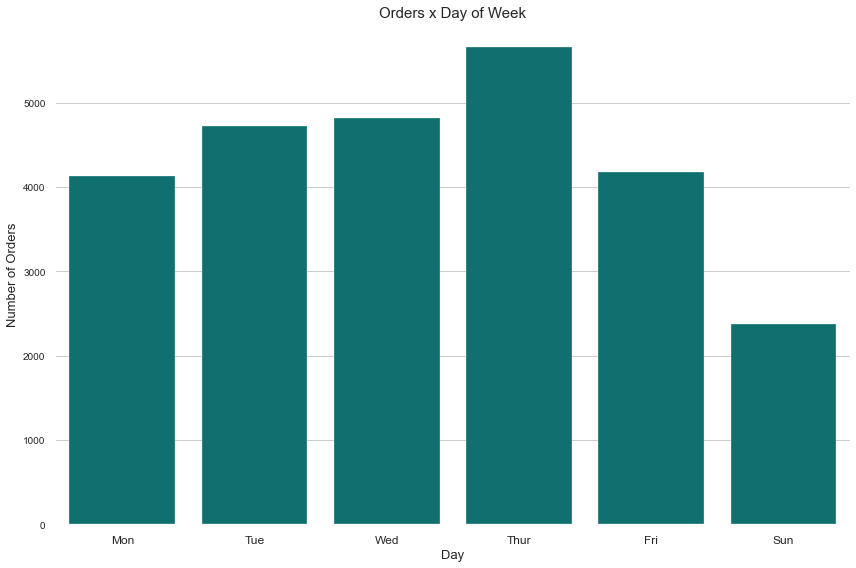

In [55]:
plt.figure(figsize=(12,8))

ax = df.groupby('InvoiceNo')['WeekDay'].unique().value_counts().sort_index()

# Removing the index brackets
ax.index = [index[0] for index in ax.index]

sns.barplot(x=ax.index, y=ax, color='teal')

plt.title('Orders x Day of Week', fontsize=15)
plt.xlabel('Day', fontsize=13)
plt.ylabel('Number of Orders', fontsize=13)

# WeekDay goes from 0-Monday to 6-Sunday
label = ['Mon','Tue','Wed','Thur','Fri','Sun']
tick = range(len(label))

plt.xticks(ticks=tick, labels=label, fontsize=12)
plt.tight_layout()

### 4.3) How many orders per hour?

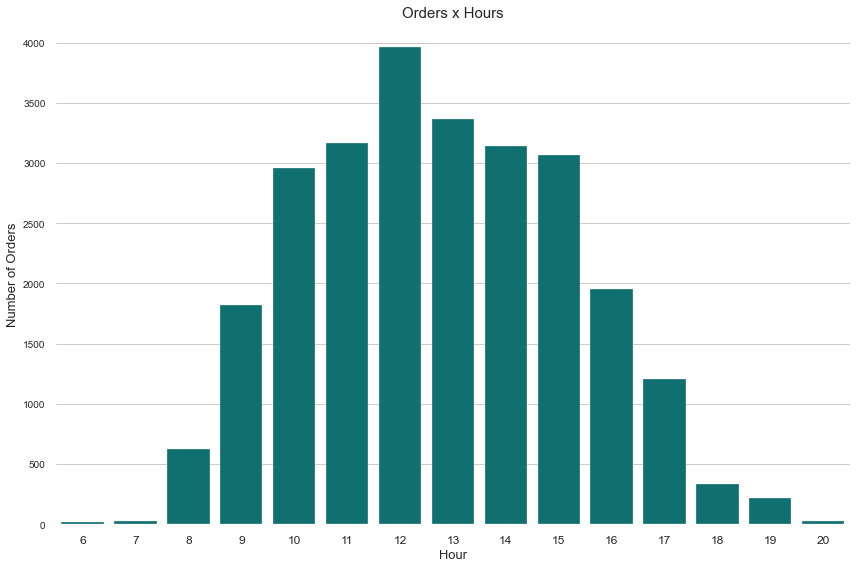

In [56]:
plt.figure(figsize=(12,8))

ax = df.groupby('InvoiceNo')['Hour'].unique().value_counts().iloc[:-1].sort_index()

# Removing the index brackets
ax.index = [index[0] for index in ax.index]

sns.barplot(x=ax.index, y=ax, color='teal')

plt.title('Orders x Hour', fontsize=15)
plt.xlabel('Hour', fontsize=13)
plt.ylabel('Number of Orders', fontsize=13)

plt.xticks(fontsize=12)
plt.tight_layout()

### 4.4) How many orders for each country?

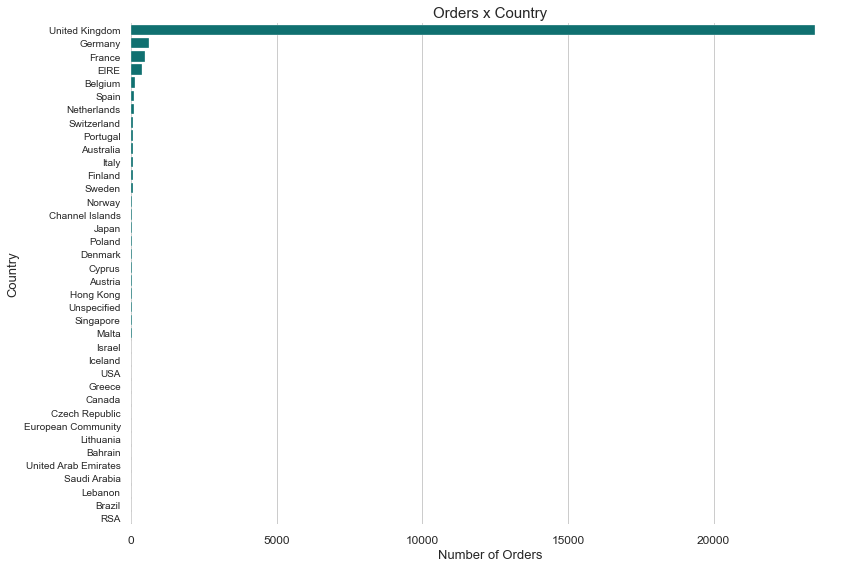

In [57]:
plt.figure(figsize=(12,8))

ax = df.groupby('InvoiceNo')['Country'].unique().value_counts()

# Removing the index brackets
ax.index = [index[0] for index in ax.index]

sns.barplot(x=ax, y=ax.index, color='teal', orient='h')

plt.title('Orders x Country', fontsize=15)
plt.xlabel('Number of Orders', fontsize=13)
plt.ylabel('Country', fontsize=13)

plt.xticks(fontsize=12)
plt.tight_layout()

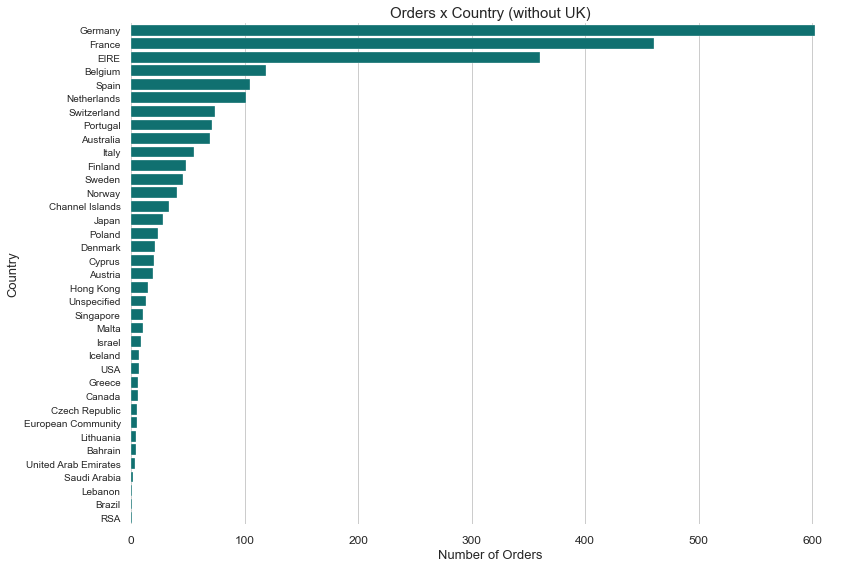

In [58]:
plt.figure(figsize=(12,8))

# UK stands out too much on the chart
ax = df.groupby('InvoiceNo')['Country'].unique().value_counts().iloc[1:]

# Removing the index brackets
ax.index = [index[0] for index in ax.index]

sns.barplot(x=ax, y=ax.index, color='teal', orient='h')

plt.title('Orders x Country (without UK)', fontsize=15)
plt.xlabel('Number of Orders', fontsize=13)
plt.ylabel('Country', fontsize=13)

plt.xticks(fontsize=12)
plt.tight_layout()

### 4.5) How much money did each country spent?

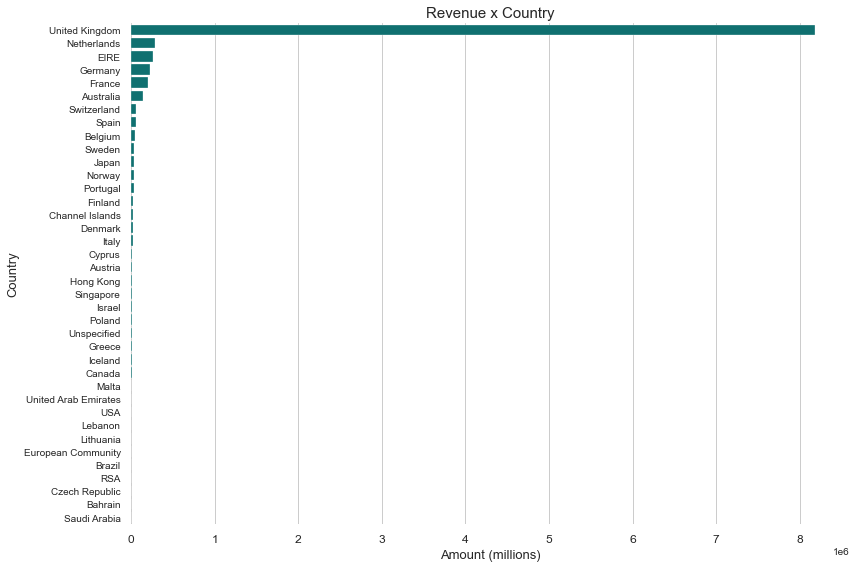

In [59]:
plt.figure(figsize=(12,8))

ax = df.groupby('Country').sum()['AmountSpent'].sort_values(ascending=False)

sns.barplot(x=ax, y=ax.index, color='teal', orient='h')

plt.title('Revenue x Country', fontsize=15)
plt.xlabel('Amount (millions)', fontsize=13)
plt.ylabel('Country', fontsize=13)

plt.xticks(fontsize=12)
plt.tight_layout()

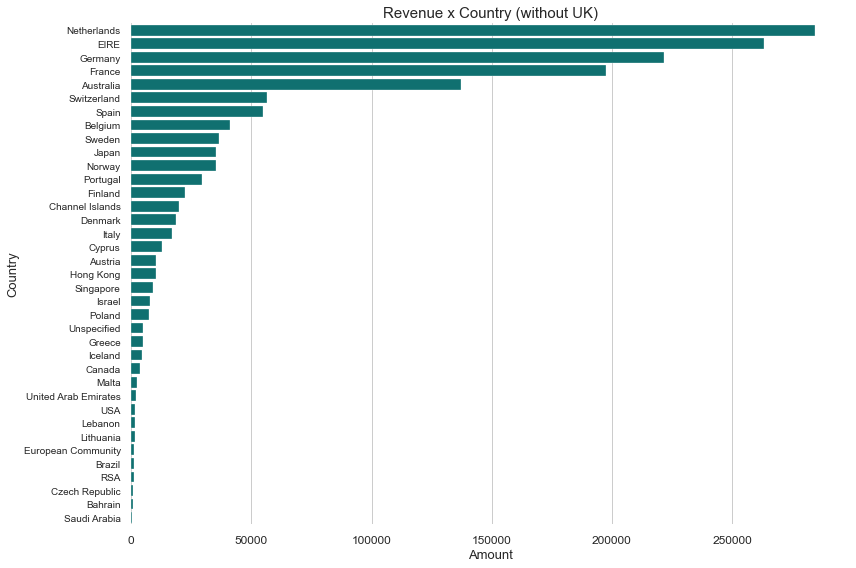

In [60]:
plt.figure(figsize=(12,8))

# UK stands out too much on the chart
ax = df.groupby('Country').sum()['AmountSpent'].sort_values(ascending=False).iloc[1:]

sns.barplot(x=ax, y=ax.index, color='teal', orient='h')

plt.title('Revenue x Country (without UK)', fontsize=15)
plt.xlabel('Amount', fontsize=13)
plt.ylabel('Country', fontsize=13)

plt.xticks(fontsize=12)
plt.tight_layout()

### 4.6) Is there a pattern to "free items"?

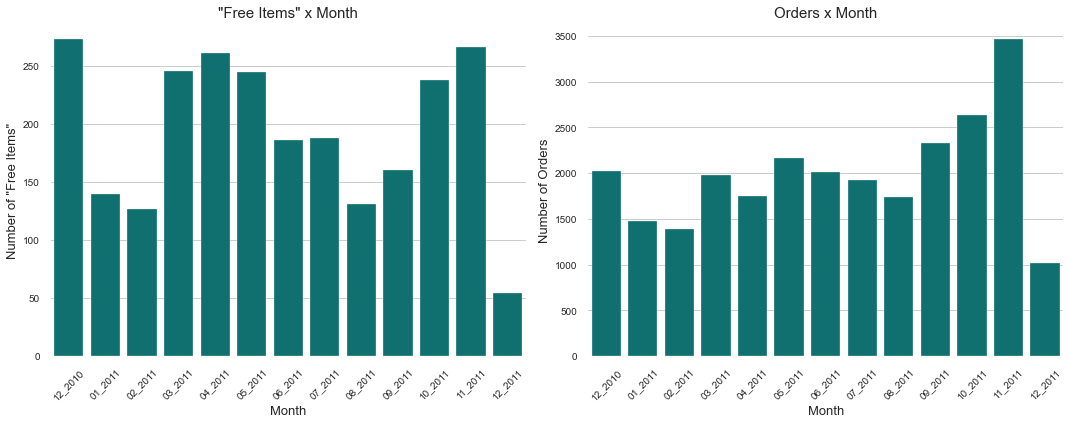

In [65]:
# Comparing the number of "free items" and the number of orders per month
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# "Free Items" x Month
ax = df[df['UnitPrice'] == 0].groupby('YearMonth').count()['StockCode'].sort_index()

sns.barplot(x=ax.index, y=ax, color='teal', ax=axes[0])

axes[0].set_title('"Free Items" x Month', fontsize=15)
axes[0].set_xlabel('Month', fontsize=13)
axes[0].set_ylabel('Number of "Free Items"', fontsize=13)

label = df['YearMonth'].apply(lambda date: date[4:] + '_' + date[:4]).unique()

axes[0].set_xticklabels(label, rotation=45)

# Orders x Month
ax = df.groupby('InvoiceNo')['YearMonth'].unique().value_counts().sort_index()

# Removing the index brackets
ax.index = [index[0] for index in ax.index]

sns.barplot(x=ax.index, y=ax, color='teal', ax=axes[1])

axes[1].set_title('Orders x Month', fontsize=15)
axes[1].set_xlabel('Month', fontsize=13)
axes[1].set_ylabel('Number of Orders', fontsize=13)

axes[1].set_xticklabels(label, rotation=45)

plt.tight_layout()

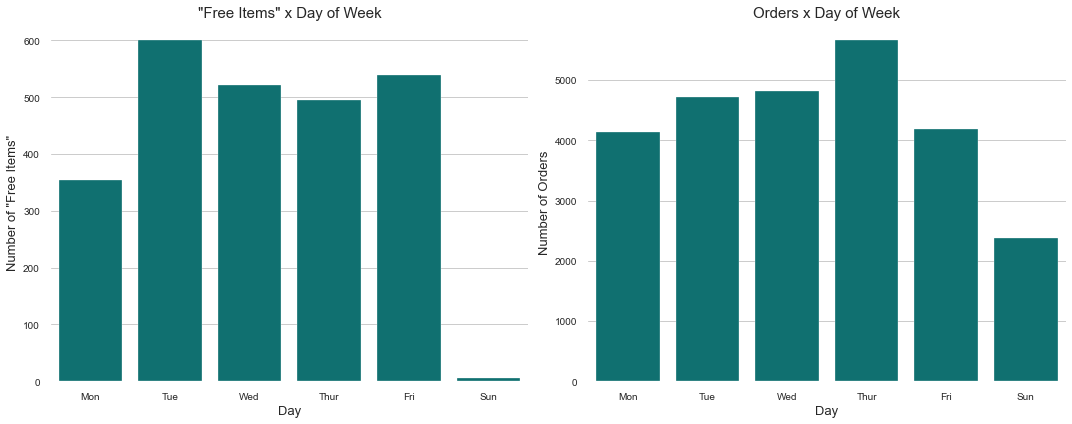

In [71]:
# Comparing the number of "free items" and the number of orders per day of week
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# "Free Items" x Day of Week
ax = df[df['UnitPrice'] == 0].groupby('WeekDay').count()['StockCode'].sort_index()

sns.barplot(x=ax.index, y=ax, color='teal', ax=axes[0])

axes[0].set_title('"Free Items" x Day of Week', fontsize=15)
axes[0].set_xlabel('Day', fontsize=13)
axes[0].set_ylabel('Number of "Free Items"', fontsize=13)

# WeekDay goes from 0-Monday to 6-Sunday
label = ['Mon','Tue','Wed','Thur','Fri','Sun']

axes[0].set_xticklabels(label)

# Orders x Day of Week
ax = df.groupby('InvoiceNo')['WeekDay'].unique().value_counts().sort_index()

# Removing the index brackets
ax.index = [index[0] for index in ax.index]

sns.barplot(x=ax.index, y=ax, color='teal', ax=axes[1])

axes[1].set_title('Orders x Day of Week', fontsize=15)
axes[1].set_xlabel('Day', fontsize=13)
axes[1].set_ylabel('Number of Orders', fontsize=13)

axes[1].set_xticklabels(label)

plt.tight_layout()

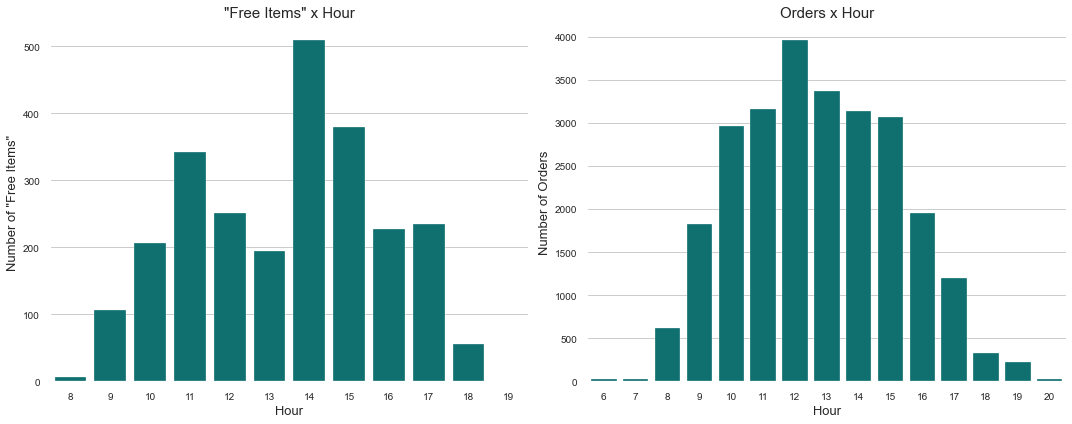

In [72]:
# Comparing the number of "free items" and the number of orders per hour
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# "Free Items" x Hour
ax = df[df['UnitPrice'] == 0].groupby('Hour').count()['StockCode'].sort_index()

sns.barplot(x=ax.index, y=ax, color='teal', ax=axes[0])

axes[0].set_title('"Free Items" x Hour', fontsize=15)
axes[0].set_xlabel('Hour', fontsize=13)
axes[0].set_ylabel('Number of "Free Items"', fontsize=13)

# Orders x Hour
ax = df.groupby('InvoiceNo')['Hour'].unique().value_counts().iloc[:-1].sort_index()

# Removing the index brackets
ax.index = [index[0] for index in ax.index]

sns.barplot(x=ax.index, y=ax, color='teal', ax=axes[1])

axes[1].set_title('Orders x Hour', fontsize=15)
axes[1].set_xlabel('Hour', fontsize=13)
axes[1].set_ylabel('Number of Orders', fontsize=13)

plt.tight_layout()